À medida que a dimensionalidade aumenta, o desempenho do classificador aumenta até que o número ideal de recursos seja atingido. Aumentar ainda mais a dimensionalidade sem aumentar o número de amostras de treinamento resulta em uma diminuição no desempenho do classificador.

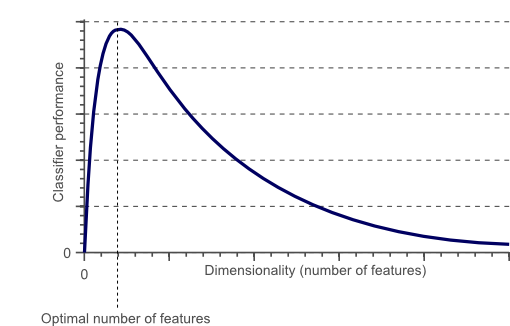

Em outras palavras, se a quantidade de dados de treinamento disponível for fixa, ocorrerá o ajuste excessivo se continuarmos adicionando dimensões. Por outro lado, se continuarmos adicionando dimensões, a quantidade de dados de treinamento precisará crescer exponencialmente rápido para manter a mesma cobertura e evitar ajustes excessivos.

Portanto, as medidas de distância começam a perder sua eficácia para medir a dissimilaridade em espaços altamente dimensionais. Como os classificadores dependem dessas medidas de distância (por exemplo, distância euclidiana, distância de Mahalanobis, distância de Manhattan), a classificação geralmente é mais fácil em espaços de menor dimensão, onde menos recursos são usados ​​para descrever o objeto de interesse. 

# Objetivos

- Se dois parâmetros são altamente correlacionados, então é redundante;
- A remoção de recursos correlatos melhora o desempenho do modelo;
- Comparar os resultados de Classificação usando modelo de ML com os parâmetros selecionados x não-selecionados.